(sec-machine-learning-intro)=
# Machine Learning

Machine learning refers to the process of teaching computers to learn statistical patterns from existing data and use them to predict unknown data. Machine learning projects consist of two main phases: training and inference. The training phase teaches computers to learn from existing data, while the inference phase predicts unknown data.

## Definition of Machine Learning

:::{note} 
In this book, bold variables represent vectors or matrices. 
:::

Given a dataset $D = \lbrace(\boldsymbol{x}_{1}, y_{1}), (\boldsymbol{x}_{2}, y_{2}), ... , (\boldsymbol{x}_{m}, y_{m}) \rbrace$, where $m$ is the number of data pairs in the dataset. The $i$-th data is denoted as $(\boldsymbol{x}_{i}, y_{i})$, which is referred to as a training example. In the housing price example mentioned in {numref}`data-science-lifecycle`, $\boldsymbol{x}_{i}$ is a vector where each element represents a feature constructed by a data scientist, such as neighborhood income, house age, number of rooms, number of bedrooms, and population. Based on this data, we can use a machine learning algorithm to model the data, learn the patterns in the data, and obtain a model. In this context, a given dataset $D$ is referred to as training set, $\boldsymbol{x}$ represents features, and $y$ represents the labeled value or the target value.

## Linear Regression

### Simple Linear Regression

We start with linear regression to understand the mathematical part of machine learning models. In high school, we used $ y = ax + b $ to model many problems, where the equation describes how the variable $ y $ changes with the variable $ x $. The equation is a straight line. If we establish such a mathematical model, knowing $ x $ we can obtain the predicted $ \hat{y} $. Statisticians put a small hat on the variable $ y $ to indicate that this is a predicted value, to distinguish it from the actual observed data. The equation has only one independent variable $ x $ and does not contain square or cubic terms that are not of the first degree, so it is called a simple **linear equation**.

When modeling a dataset, we start with the simplest, focusing only on two dimensions of data: house area ($ x $) and house price ($ y $). We can construct different straight lines by taking different values for the parameters $ a $ and $ b $, thus forming a parameter family, and there is an optimal one within the parameter family. Then the supervised learning process of simple linear regression can be defined as: given $ m $ pairs of data $ (x, y) $, find the best parameters $ a^* $ and $ b^* $ so that the model can better fit the training data. $ a $ and $ b $ can take different parameters, but which parameter is the best? How can we measure whether the model fits the data most optimally? Machine learning uses the **loss function** to measure this issue. The loss function, also known as the cost function, calculates the degree of difference between the model's predicted value $ \hat{y} $ and the actual value $ y $. The loss function calculates the loss or cost of the model's mistakes, the larger the loss function, the worse the model, and the less it can fit the data. Statisticians usually use $ L(\hat{y}, y) $ to represent the loss function.

For linear regression, a simple and practical loss function is the average of the squared errors between the predicted values and the actual values, as shown in the formula below, where $i$ represents the $i$-th sample in the dataset:

$$
L(\hat{y}, y) = \frac{1}{m} \sum_{i=1}^m(\hat{y}_{i}- y_{i})^2 
$$

Substituting the formula $ \hat{y}=ax + b $ into it, we get:

$$
L(\hat{y}, y) =\frac{1}{m} \sum_{i=1}^m[(ax_{i} + b) - y_{i}]^2
$$

For a given dataset, the values of $ x $ and $ y $ are known, and the parameters $ a $ and $ b $ are to be solved. The process of solving the model is the process of solving the following formula:

$$
a^*, b^* = \mathop{\arg\min}_{a, b}L(a, b)
$$

The notation $ \arg\min $ is a common mathematical symbol, indicating the search for parameters $ a^* $ and $ b^* $ that can minimize the $ L $ function.

$$
a^*, b^* = \mathop{\arg\min}_{a, b}\frac{1}{m}\sum_{i=1}^m[(ax_{i} + b) - y_{i}]^2
$$

There are generally two methods to solve this function:

* Based on knowledge of calculus and linear algebra, find the point where the derivative of $L$ is 0, which is the optimal point. This method can only solve simple models.
* Based on gradient descent, iteratively search for the optimal point. The gradient descent method can solve many complex models, such as deep learning models, which are further explained in {numref}`sec-deep-learning-intro`.

### General Form of Linear Regression

We now extend the regression problem to a more general scenario. Suppose $ \boldsymbol{x} $ is multivariate, or multi-dimensional. For example, to predict housing prices, many factors need to be considered, including the number of bedrooms (two-bedroom, three-bedroom, four-bedroom), surrounding businesses, etc. As shown in the formula below, each factor is a $ W $:

$$
f(\boldsymbol{x}) = b + W_1 \times x_1 + W_2 \times x_2 + ... + W_n \times x_n
$$

$ W $ is the **parameter**, also known as the **weight**. There are a total of $ n $ influencing factors, i.e., $\boldsymbol{x}$ is $n$ dimensional. In machine learning, $\boldsymbol{x} is referred to as **features**.

$$
f(\boldsymbol{x}) = b + \boldsymbol{W} \boldsymbol{{x}}
$$

The predicted $ y $ is a real number, ranging from negative infinity to positive infinity, and a model that predicts real numbers is called a **regression model**.

## Logistic Regression

Regression problems refer to target values in the entire real number domain, while classification problems refer to target values that are finite discrete values. For example, we want to perform sentiment classification, and the target values have two options, 0 and 1, representing negative and positive, a binary classification function can be represented as:

$$
y = 
\begin{cases}
   0 &\text{if } z < 0 \\
   1 &\text{if } z \geq 0
\end{cases}
$$

Based on linear regression, we apply a function $ g(z) $ to the outside:

$$
g(z)= \frac 1 {1+e^{-z}}
$$

This $ g(z) $ is known as the Sigmoid function or Logistic function, and the Sigmoid function is visualized below.

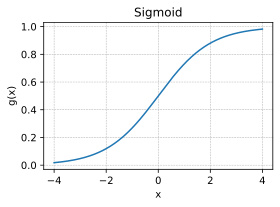

In [1]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 1, figsize=(4, 3), sharey=True)

# 创建 x 轴的数据
x = np.linspace(-4, 4, 200)

# 创建 sigmoid 函数的 y 轴数据
sigmoid = 1 / (1 + np.exp(-x))

plt.plot(x, sigmoid, label='Sigmoid function')
plt.title('Sigmoid')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

The properties of the Logistic function indicate that it can map $(-\infty, +\infty)$ to $(0, 1)$. The Logistic function has a clear dividing line and takes the value of 0.5 at the midpoint. Because the Logistic function has a clear dividing line, it can be used for classification. By incorporating the linear regression into the logistic function, we obtain:

$$
y = f(\boldsymbol{x}) = g(\boldsymbol{W} \boldsymbol{x}) = \frac 1{1+e^{-\boldsymbol{W} \boldsymbol{x}}}
$$

We will not go into the mathematical part of the training and solving of logistic regression here, and interested readers can search for related knowledge on the Internet.